#### Agrupamento de ativos utilizando IA

In [3]:
## IMPORTANDO OS PACOTES NECESSARIOS

## Coleta de dados
import yfinance as yf

# Pré-processamento
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import math

## Vizualização
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Agrupamento
from collections import Counter
import os

## Modelos
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS

In [4]:
# intervalo dos dados
# intervalo = '2010_2020'
# intervalo = '2017_2023'
# intervalo = '2019'
# intervalo = '2010_2023'
intervalo = 'novo'

In [5]:
# ## Ciar os diretorios
# anos = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

# for nome in anos:
#     try:
#         os.makedirs(f'resultados/{nome}/classes')
#         print(f"Pasta '{nome}' criada com sucesso!")
#     except FileExistsError:
#         print(f"A pasta '{nome}' já existe.")


### Ações

In [6]:
## Ativos listados no Ibovespa e seus respectivos codigos de operação
acoes = pd.read_csv("data/ibovespa.csv")
acoes.head()

acoes = acoes.drop(acoes[acoes.eq('ASAI3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('CRFB3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('HAPV3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('IRBR3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('NTCO3').any(axis=1)].index)

## 2010_2020
acoes = acoes.drop(acoes[acoes.eq('AZUL4').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('BBSE3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('BPAC11').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('COGN3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('CVCB3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('ECOR3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('KLBN11').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('MGLU3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('PRIO3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('QUAL3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('RAIL3').any(axis=1)].index)


#ERRO NA COLETA ( valores lineares e constantes por grande periodo de tempo )
acoes = acoes.drop(acoes[acoes.eq('PCAR3').any(axis=1)].index)
acoes = acoes.drop(acoes[acoes.eq('SUZB3').any(axis=1)].index)


In [7]:
len(acoes)

54

In [8]:
## ATIVOS ESCOLHIDOS
ativos = list(acoes["Ativo"].values)

In [9]:
# api_key = 'JWKID811CEAQ42N6'
# ts = TimeSeries(key=api_key)
# symbol = 'PETR4.SA'
# start_date = datetime.datetime(2010, 1, 1) 
# end_date = datetime.datetime(2011, 12, 31) 

# data, metadata = ts.get_daily(symbol, outputsize='full') # type: ignore

In [10]:
anos = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

In [11]:
## coletando os dados



for ano in anos:
  data = {}
  for ativo in ativos:
    data[ativo] = (yf.download(ativo + '.SA', start=f'{ano}-01-01', end=f'{ano + 1}-01-01')['Close'])

  data = pd.DataFrame(data)
  data.to_excel(f"data/{ano}.xlsx")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

KeyboardInterrupt: 

### Impotando dados

In [ ]:
## IMPORTAR OS VALORES

intervalo = anos[9]
dados = pd.read_excel(f'data/{intervalo}.xlsx', index_col='Date') # type: ignore
dados.head()

## SELECIONANDO TODOS OS ATIVOS
ativos = list(acoes["Ativo"].values)

papeis = dados[ativos]
papeis.head()

NameError: name 'anos' is not defined

### Transformações

In [ ]:
## Tranformação de YEO-JOHNSON

X_y = papeis.copy()
for p in papeis.columns:
  transformacao, lambda_param = stats.yeojohnson(papeis[p])
  X_y[p] = transformacao

In [ ]:
## Padronização
X_p = X_y.copy()
# X_p = papeis.copy()
for p in papeis.columns:
  scaler = StandardScaler()

  f = np.array(X_p[p]).reshape(-1,1)

  X_p[p] = scaler.fit_transform(f)

X_p.head()

ABEV3     B3SA3     BBAS3     BBDC3     BBDC4     BEEF3  \
Date                                                                     
2019-01-02 -2.333666 -1.818349 -0.191534 -1.268852 -0.967946 -2.201258   
2019-01-03 -2.088947 -1.604595 -0.118442 -0.884607 -0.762965 -2.083982   
2019-01-04 -1.797355 -1.789830 -0.118442 -1.305494 -0.930882 -1.896891   
2019-01-07 -1.889256 -1.816564 -0.235594 -1.148201 -0.679931 -1.924315   
2019-01-08 -2.333666 -1.802297 -0.439519 -0.937469 -0.551406 -1.979829   

               BRAP4     BRFS3     BRKM5     CCRO3  ...     SBSP3    TAEE11  \
Date                                                ...                       
2019-01-02 -0.100727 -1.373147  1.055390 -1.435136  ... -2.317755 -1.905172   
2019-01-03 -0.631189 -1.487536  1.074644 -1.214112  ... -1.815632 -1.853644   
2019-01-04  0.246343 -1.492586  1.038606 -1.292857  ... -1.661171 -1.166800   
2019-01-07  0.347446 -1.474874  1.015501 -1.492658  ... -1.819336 -1.462839   
2019-01-08  0.254489 -1.300545  1.013447 -1.298507  ... -1.793433 -1.477106   

               TIMS3     TOTS3     UGPA3     USIM5     VALE3     VIVT3  \
Date                                                                     
2019-01-02  0.202683 -1.958480  1.468702  1.128116  0.615632 -0.901307   
2019-01-03 -0.081073 -1.873206  1.364867  0.904178 -0.107912 -1.191146   
2019-01-04 -0.004434 -1.770382  1.326960  1.496972  1.013640 -1.372000   
2019-01-07  0.450247 -1.852738  1.150235  1.517889  0.911195 -1.307413   
2019-01-08  0.911568 -2.008205  1.053274  1.138730  1.094680 -1.849640   

               WEGE3     YDUQ3  
Date                            
2019-01-02 -1.388169 -2.123574  
2019-01-03 -1.157680 -2.133483  
2019-01-04 -1.046705 -1.949764  
2019-01-07 -1.201184 -2.193511  
2019-01-08 -1.284645 -2.079319  

[5 rows x 54 columns]

In [ ]:
## Aplicando Min-Max-Scaler

# X_scaled = X_y.copy()
# for p in papeis.columns:
#   # Criando uma instância do MinMaxScaler
#   scaler = MinMaxScaler(feature_range=(0,1))

#   # Aplicando a transformação Min-Max Scaler
#   d = np.array(X_y[p]).reshape(-1,1)
#   X_scaled[p] = scaler.fit_transform(d)

# X_scaled

### Definindo a entrada dos modelos 

In [ ]:
# Entradas
X = np.array(X_p.T)
# X[0]

In [ ]:
## NUMERO DE CLUSTERS
clusters = 8

### Vizualização

In [ ]:
# Cria uma figura com uma grade de 2 linhas e 5 colunas para os subplots
# fig, axs = plt.subplots(5, 2, figsize=(12, 10))

# Itera sobre cada subplot e plota o gráfico correspondente
# for i, ax in enumerate(axs.flatten()):
    # ax.plot(papeis.index, X[i])
    # ax.set_title(f'{papeis.columns[i]}')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')


# Ajusta o espaçamento entre os subplots
# plt.tight_layout()

# Exibe a figura com os subplots
# plt.show()

### Modelos de agrupamento

#### Affinity Propagation

In [ ]:
# # Executando o Affinity Propagation
# aff_prop = AffinityPropagation(damping=0.945, random_state=42)
# y_pred = aff_prop.fit_predict(X)

# # Obtendo os centróides dos clusters
# centroids = aff_prop.cluster_centers_

# # Número de clusters encontrados
# num_clusters = len(np.unique(y_pred))

# # Imprime as previsões dos clusters e os centróides
# print("Previsões dos clusters:")
# print(y_pred)

# print(num_clusters)

In [ ]:
# X

In [ ]:
# num_clusters

In [ ]:
## salvar os resultados encontrados em um array externo
# name = "models/2010_2020/aff_prop.npy"
# np.save(name, y_pred)

In [ ]:
# =CONT.VALORES(B2:B250)

#### K-Means

In [ ]:
kmeans = KMeans(n_clusters=clusters, n_init=10, random_state=42)

# Aplica o algoritmo aos dados
kmeans.fit(X)

# Obtém as previsões dos clusters para cada ponto de dado
y_pred = kmeans.labels_

# Obtém as coordenadas dos centróides dos clusters
centroids = kmeans.cluster_centers_

# Imprime as previsões dos clusters e os centróides
print("Previsões dos clusters:")
print(y_pred)

Previsões dos clusters:
[0 0 1 1 1 0 3 0 6 0 6 4 0 0 0 4 0 0 5 5 6 0 0 0 0 0 0 2 2 0 0 7 7 0 0 0 0
 0 0 3 3 0 0 7 0 0 2 0 6 6 3 0 0 0]


In [ ]:
## salvar os resultados encontrados em um array externo
name = f"models/{ intervalo}/k-means.npy"
np.save(name, y_pred)

#### Hierarchical Agglomerative Clustering (HAC): 

In [ ]:
## É um algoritmo de clusterização hierárquica que constrói uma hierarquia de clusters. Começa com cada ponto de dados como um 
## cluster separado e mescla iterativamente os clusters mais próximos até que todos os pontos de dados estejam em um único cluster.

In [ ]:
# Executando o HAC
hac = AgglomerativeClustering(n_clusters=clusters)
y_pred = hac.fit_predict(X)

# Imprime as previsões dos clusters e os centróides
print("Previsões dos clusters:")
print(y_pred)

Previsões dos clusters:
[6 7 1 1 1 7 0 7 4 2 4 3 6 7 7 3 2 6 5 5 4 6 7 6 2 2 2 0 0 6 2 2 1 7 7 6 7
 6 2 0 0 7 6 1 6 6 0 7 4 4 0 6 2 2]


In [ ]:
## salvar os resultados encontrados em um array externo
name = f"models/{ intervalo}/hac.npy"
np.save(name, y_pred)

#### Mean Shift

In [ ]:
# Executando o Mean Shift
# mean_shift = MeanShift(bandwidth=41)    # 2010_2023
# mean_shift = MeanShift(bandwidth=45)    # novo
# mean_shift = MeanShift(bandwidth=12.55)    # 2019
# mean_shift = MeanShift(bandwidth=37.0)   # 2010_2020
# mean_shift = MeanShift(bandwidth=37.0)   # 2010_2020
# mean_shift = MeanShift(bandwidth=13)   # 2010

# mean_shift = MeanShift(bandwidth=11.92)   # 2012. 2013
# mean_shift = MeanShift(bandwidth=11.6)   # 2015
# mean_shift = MeanShift(bandwidth=13.4)   # 2016
# mean_shift = MeanShift(bandwidth=14.7)   # 2017
# mean_shift = MeanShift(bandwidth=13.1)   # 2018
mean_shift = MeanShift(bandwidth=12.55)   # 2019
# mean_shift = MeanShift(bandwidth=9.25)   # 2020


y_pred = mean_shift.fit_predict(X)

# Obtendo os centróides dos clusters
centroids = mean_shift.cluster_centers_

# Número de clusters encontrados
num_clusters = len(np.unique(y_pred))


# Imprime as previsões dos clusters e os centróides
print("Previsões dos clusters:")
print(y_pred)
num_clusters

Previsões dos clusters:
[0 0 1 2 1 0 3 0 1 0 1 5 0 0 0 7 0 0 4 4 1 0 0 0 0 0 0 1 1 0 0 2 2 0 0 0 0
 0 0 3 3 0 0 2 0 0 6 0 1 1 3 0 0 0]


8

In [ ]:
## salvar os resultados encontrados em um array externo
name = f"models/{ intervalo}/mean_shift.npy"
np.save(name, y_pred)

#### Spectral clustering

In [ ]:
# Executando o Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=clusters, affinity='nearest_neighbors')
y_pred = spectral_clustering.fit_predict(X)

# Imprime as previsões dos clusters e os centróides
print("Previsões dos clusters:")
print(y_pred)

Previsões dos clusters:
[4 0 3 3 3 0 6 5 2 1 2 4 4 0 0 7 1 7 4 4 2 7 0 7 1 1 1 6 6 7 1 3 3 5 0 1 5
 7 1 6 6 0 7 3 7 7 6 0 2 2 6 0 1 1]


In [ ]:
## salvar os resultados encontrados em um array externo
name = f"models/{ intervalo}/spectral_clustering.npy"
np.save(name, y_pred)

#### BIRCH

In [ ]:
birch = Birch(n_clusters=clusters, threshold=0.5)

# Realizar o clustering
birch.fit(X)

# Obter os rótulos dos clusters
y_pred = birch.labels_

In [ ]:
y_pred

array([6, 7, 1, 1, 1, 7, 0, 7, 4, 2, 4, 3, 6, 7, 7, 3, 2, 6, 5, 5, 4, 6,
       7, 6, 2, 2, 2, 0, 0, 6, 2, 2, 1, 7, 7, 6, 7, 6, 2, 0, 0, 7, 6, 1,
       6, 6, 0, 7, 4, 4, 0, 6, 2, 2])

In [ ]:
## salvar os resultados encontrados em um array externo
name = f"models/{ intervalo}/birch.npy"
np.save(name, y_pred)

#### DBSCAN

In [ ]:
# Instanciar o classificador DBSCAN
# dbscan = DBSCAN(eps=0.02, min_samples=2)

# # Realizar o clustering
# dbscan.fit(X)

# # Obter os rótulos dos clusters
# y_pred = dbscan.labels_
# y_pred

In [ ]:
## salvar os resultados encontrados em um array externo
# name = "models/dbscan.npy"
# np.save(name, y_pred)

### Agrupamento dos modelos

In [ ]:
## Ponto importante: colocar uma quantidade de modelos maior que a quantidade de classes desejadas para que possa ser encontrado a maior frequencia de votação
## para que nao acontece de cada classe receber um voto e com isso o agrupamento escolher uma classse que naõ necessariamente seja a melhor

In [ ]:
## Acessar e armazenar os nomes dos modelos unitários
# Lista para armazenar os nomes dos arquivos
nomes_arquivos = []

# Percorre todos os arquivos e diretórios dentro da pasta
for nome in os.listdir(f"models/{ intervalo}"):
    caminho_completo = os.path.join(f"models/{ intervalo}", nome)
    if os.path.isfile(caminho_completo):
        nomes_arquivos.append(nome)

print(nomes_arquivos)

['hac.npy', 'birch.npy', 'k-means.npy', 'spectral_clustering.npy', 'mean_shift.npy']


In [ ]:
## Acessar e armazenar em uma matriz os resultados de cada modelo unitário

modelos = []
for arquivo in nomes_arquivos:
    modelos.append(np.load(f"models/{ intervalo}/{arquivo}"))

modelos = np.array(modelos)
modelos

array([[6, 7, 1, 1, 1, 7, 0, 7, 4, 2, 4, 3, 6, 7, 7, 3, 2, 6, 5, 5, 4, 6,
        7, 6, 2, 2, 2, 0, 0, 6, 2, 2, 1, 7, 7, 6, 7, 6, 2, 0, 0, 7, 6, 1,
        6, 6, 0, 7, 4, 4, 0, 6, 2, 2],
       [6, 7, 1, 1, 1, 7, 0, 7, 4, 2, 4, 3, 6, 7, 7, 3, 2, 6, 5, 5, 4, 6,
        7, 6, 2, 2, 2, 0, 0, 6, 2, 2, 1, 7, 7, 6, 7, 6, 2, 0, 0, 7, 6, 1,
        6, 6, 0, 7, 4, 4, 0, 6, 2, 2],
       [0, 0, 1, 1, 1, 0, 3, 0, 6, 0, 6, 4, 0, 0, 0, 4, 0, 0, 5, 5, 6, 0,
        0, 0, 0, 0, 0, 2, 2, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 7,
        0, 0, 2, 0, 6, 6, 3, 0, 0, 0],
       [4, 0, 3, 3, 3, 0, 6, 5, 2, 1, 2, 4, 4, 0, 0, 7, 1, 7, 4, 4, 2, 7,
        0, 7, 1, 1, 1, 6, 6, 7, 1, 3, 3, 5, 0, 1, 5, 7, 1, 6, 6, 0, 7, 3,
        7, 7, 6, 0, 2, 2, 6, 0, 1, 1],
       [0, 0, 1, 2, 1, 0, 3, 0, 1, 0, 1, 5, 0, 0, 0, 7, 0, 0, 4, 4, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2,
        0, 0, 6, 0, 1, 1, 3, 0, 0, 0]])

In [ ]:
## Encontra a classe qua mais recebeu votos

def valor_mais_frequente(lista):
    contador = Counter(lista)
    valor_mais_comum = contador.most_common(1)[0][0]
    return valor_mais_comum

In [ ]:
## Y é a saida do modelo agrupado

Y = []
for i in range(len(modelos[0])):
  Y.append(valor_mais_frequente(modelos[:,i])) # type: ignore
print(Y)

[6, 0, 1, 1, 1, 0, 0, 7, 4, 2, 4, 3, 6, 0, 0, 3, 2, 6, 5, 5, 4, 6, 0, 6, 2, 2, 2, 0, 0, 6, 2, 2, 1, 7, 0, 6, 7, 6, 2, 0, 0, 0, 6, 1, 6, 6, 0, 0, 4, 4, 0, 0, 2, 2]


In [ ]:
## SALVANDO AS CLASSES AGRUPADAS PELOS MODELOS
resultado = pd.DataFrame(data={"ativos":papeis.columns,
                               "classes": Y})
resultado.to_excel(f"resultados/{intervalo}/classes.xlsx", index=False)

In [ ]:
## DEFININDO AS CORES PARA CADA CLASSE
# Vermelho: #FF0000
# Verde: #00FF00
# Azul: #0000FF
# Laranja: #FFA500
# Roxo: #800080
# Amarelo: #FFFF00
# Ciano: #00FFFF
# Magenta: #FF00FF

colors = Y

colors = ["#FF0000" if y == 0 else y for y in colors]
colors = ["#00FF00" if y == 1 else y for y in colors]
colors = ["#0000FF" if y == 2 else y for y in colors]
colors = ["#FFA500" if y == 3 else y for y in colors]

colors = ["#800080" if y == 4 else y for y in colors]
colors = ["#FFFF00" if y == 5 else y for y in colors]
colors = ["#00FFFF" if y == 6 else y for y in colors]
colors = ["#FF00FF" if y == 7 else y for y in colors]

In [ ]:
## Vizualização das classes criadas pelo modelo agrupado

fig, axs = plt.subplots(18, 3, figsize=(20, 50))
# fig, axs = plt.subplots(22, 3, figsize=(20, 50))

# Itera sobre cada subplot e plota o gráfico correspondente
for i, ax in enumerate(axs.flatten()):
    
    ax.plot(papeis.index, X[i], color=colors[i])
    ax.set_title(f'{papeis.columns[i]}')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')


# Ajusta o espaçamento entre os subplots
plt.tight_layout()

## SALVANDO AS PLOTAGENS
plt.savefig(f"resultados/{intervalo}/plotagemClasses.png")

# Exibe a figura com os subplots
plt.show()


#### Analisando as classes criadas

In [ ]:
## Seram analisadas as classes criadas considerando todas as 67 empresas listadas

classes = pd.read_excel(f"resultados/{intervalo}/classes.xlsx")

In [ ]:
contagem = classes['classes'].value_counts()
labels = contagem.index
contagem

classes
0    16
6    11
2    10
1     5
4     5
7     3
3     2
5     2
Name: count, dtype: int64

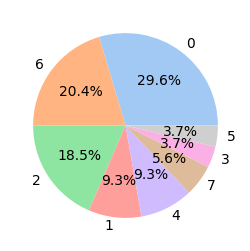

In [ ]:
plt.figure(figsize=(3, 3))
sns.set_palette('pastel')  # Define a paleta de cores
plt.pie(contagem, labels=labels, autopct='%1.1f%%'); # type: ignore

## SALVANDO AS PLOTAGENS
plt.savefig(f"resultados/{intervalo}/plotagemClassesFrequencia.png")

##### Plotando as séries de mesma classe

In [ ]:
classificacao = pd.read_excel(f"resultados/{intervalo}/classes.xlsx")
classes = classificacao['classes'].value_counts().index

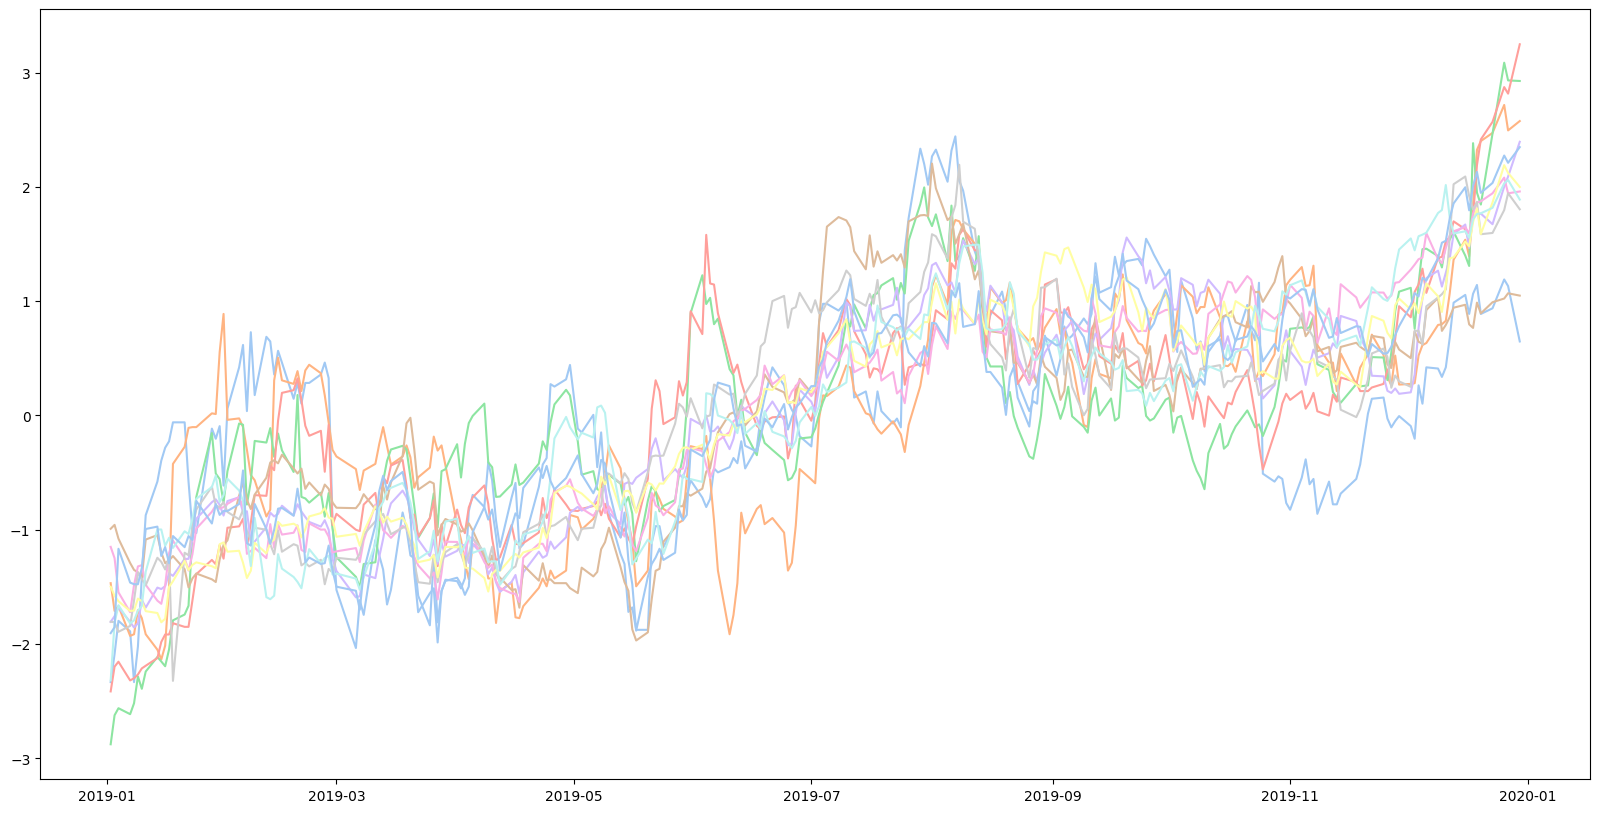

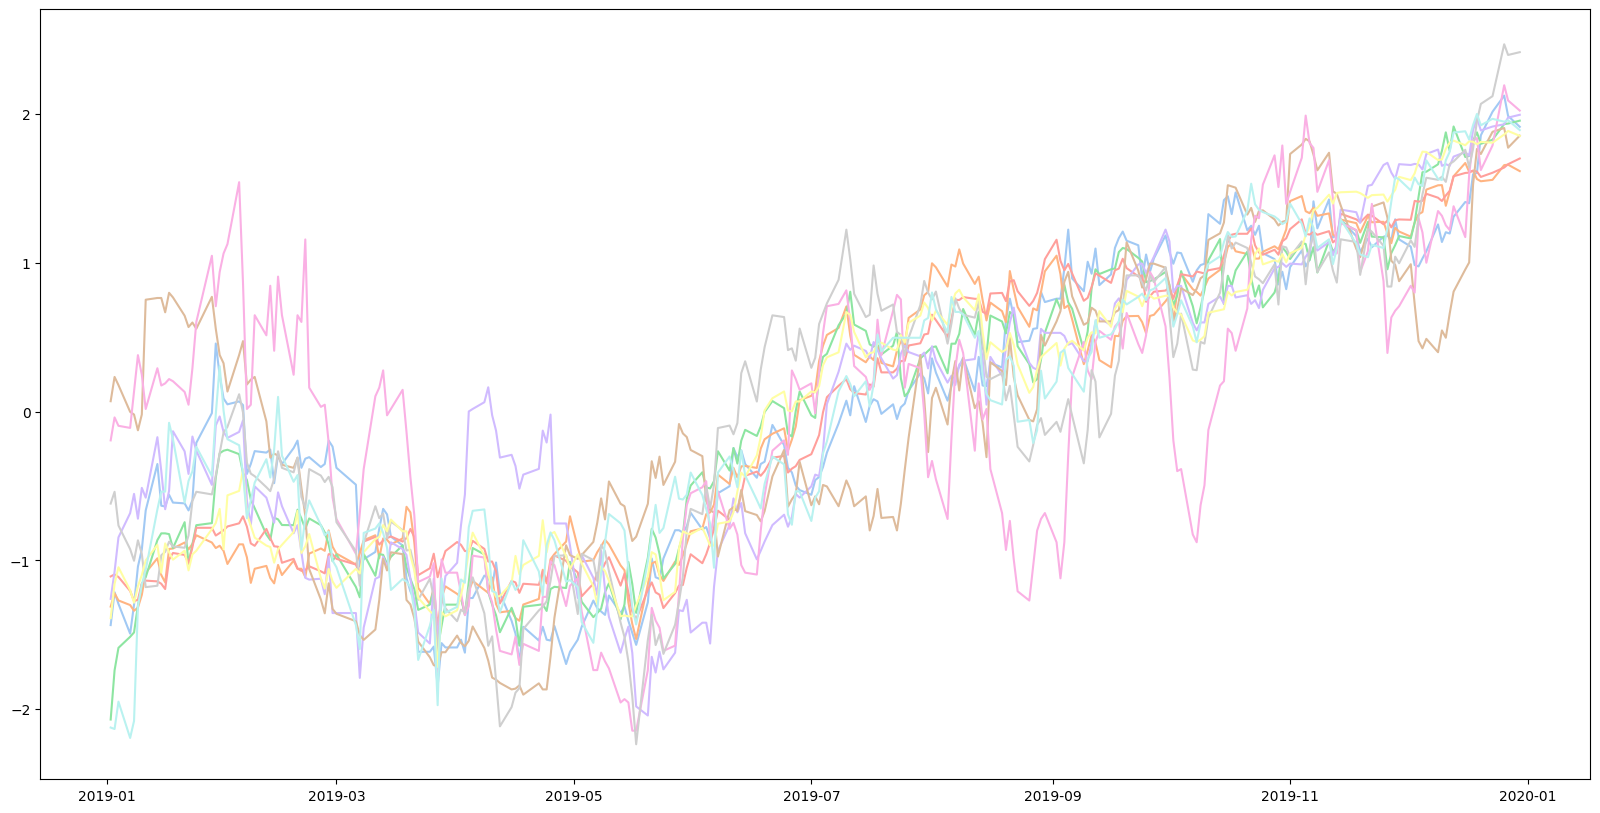

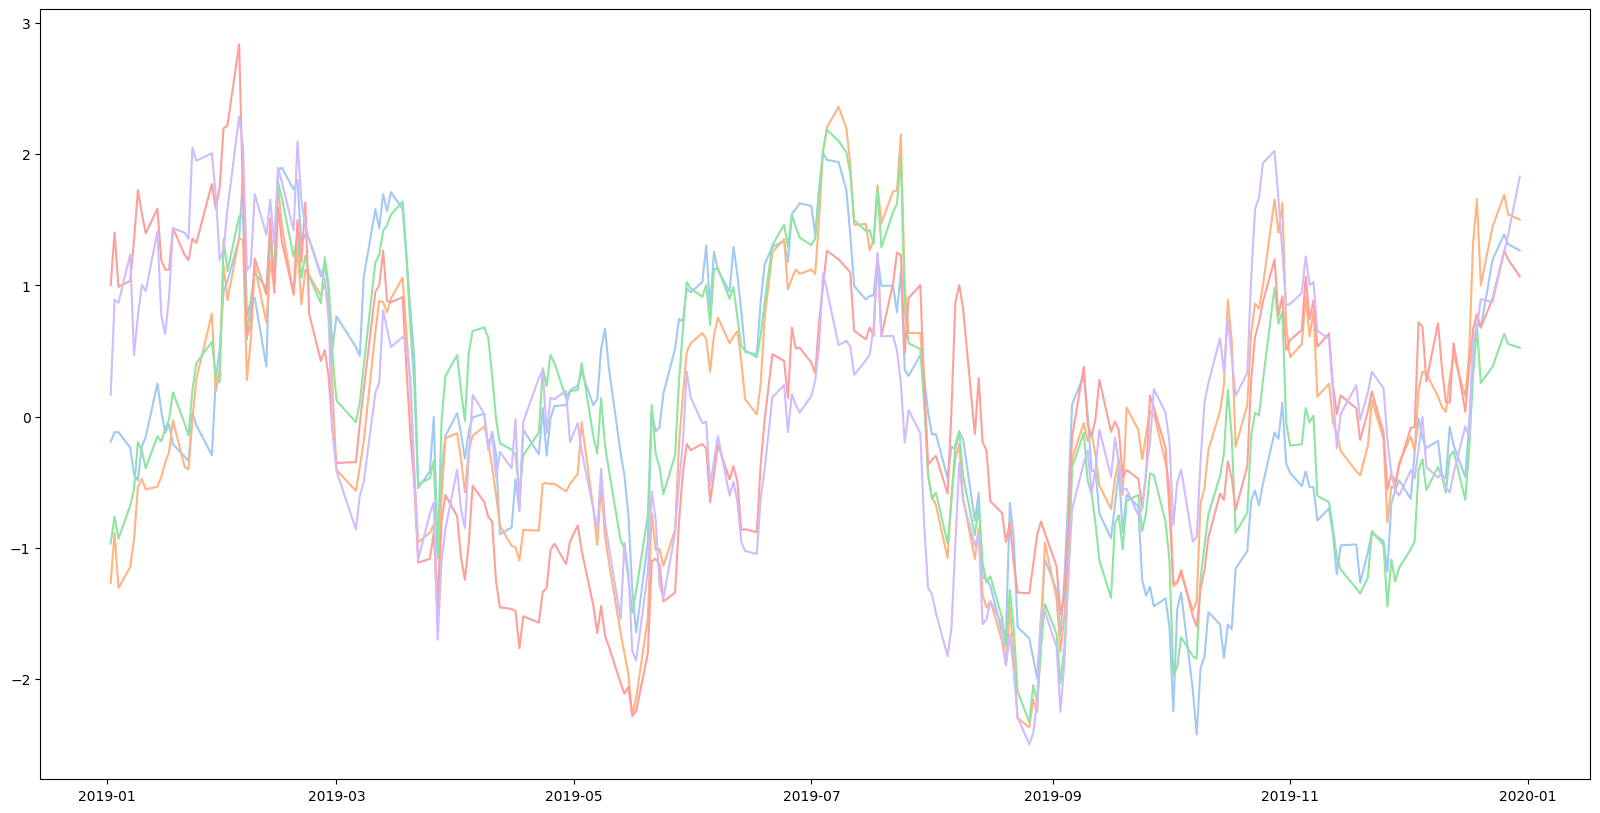

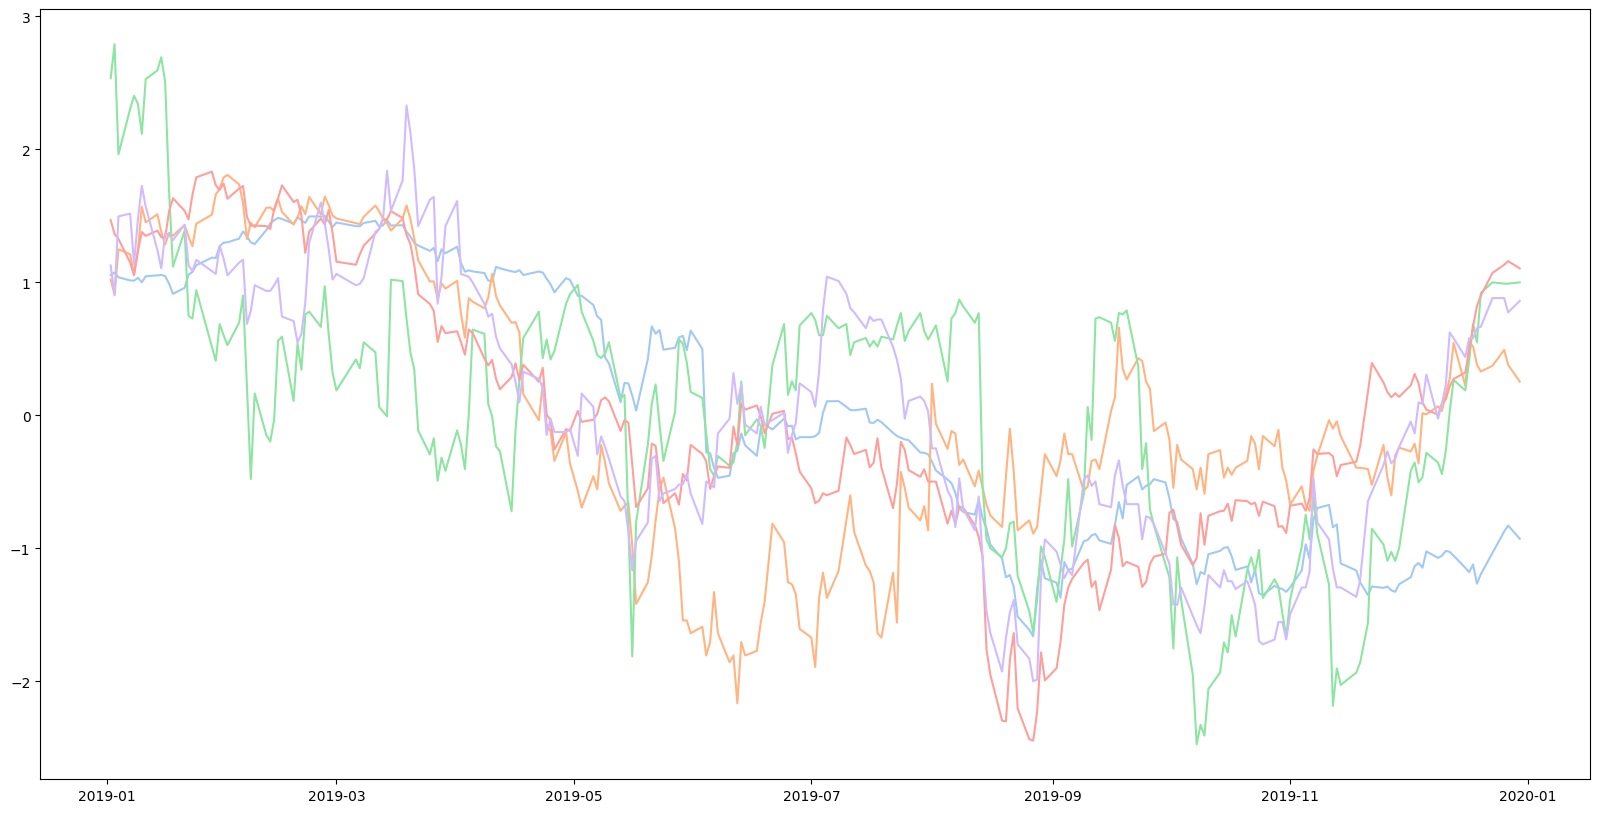

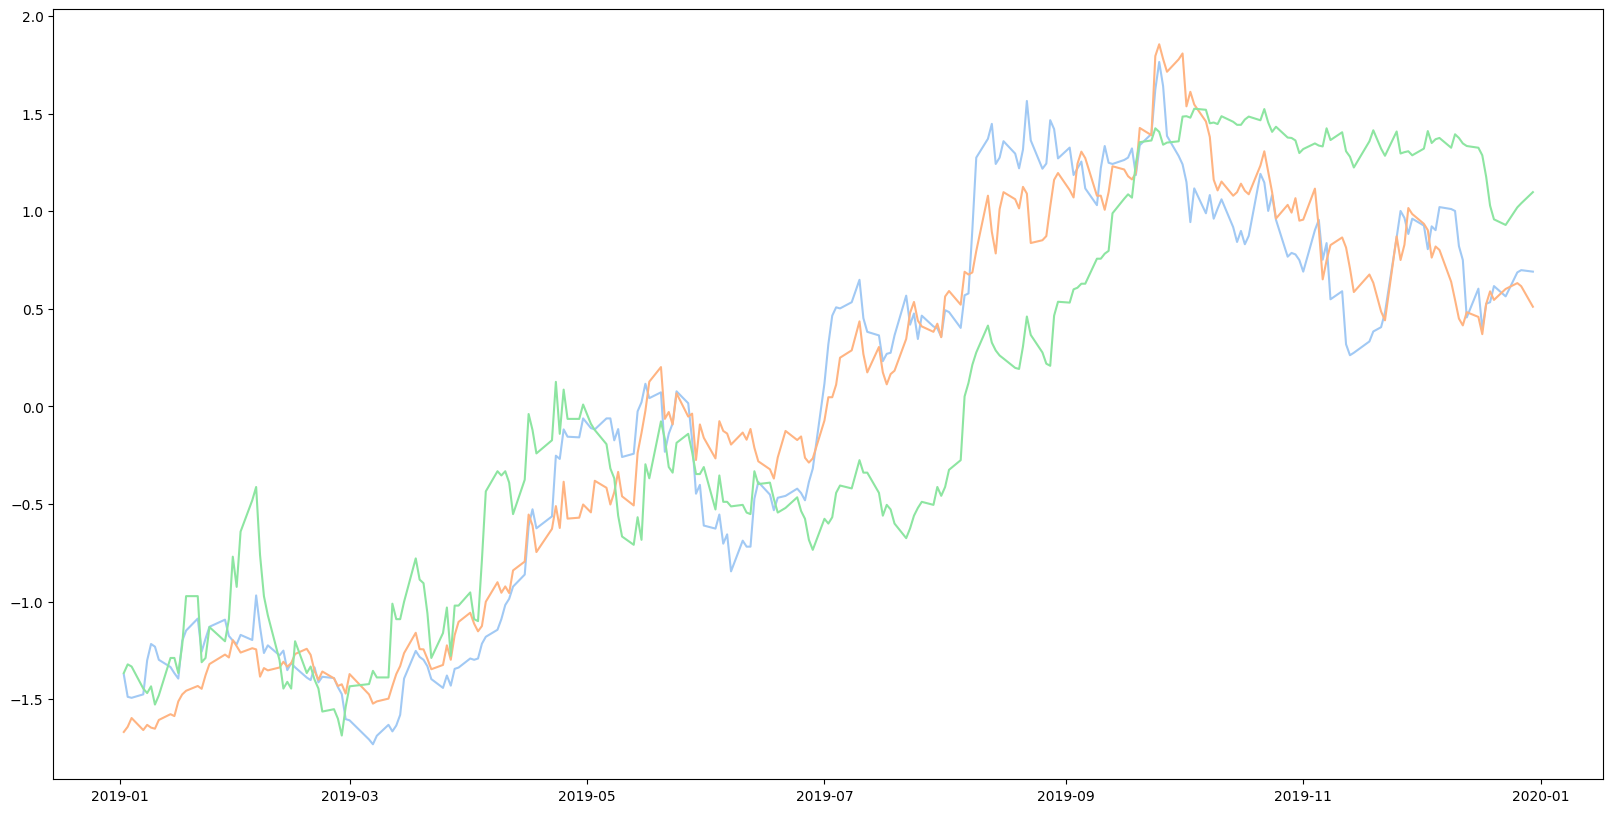

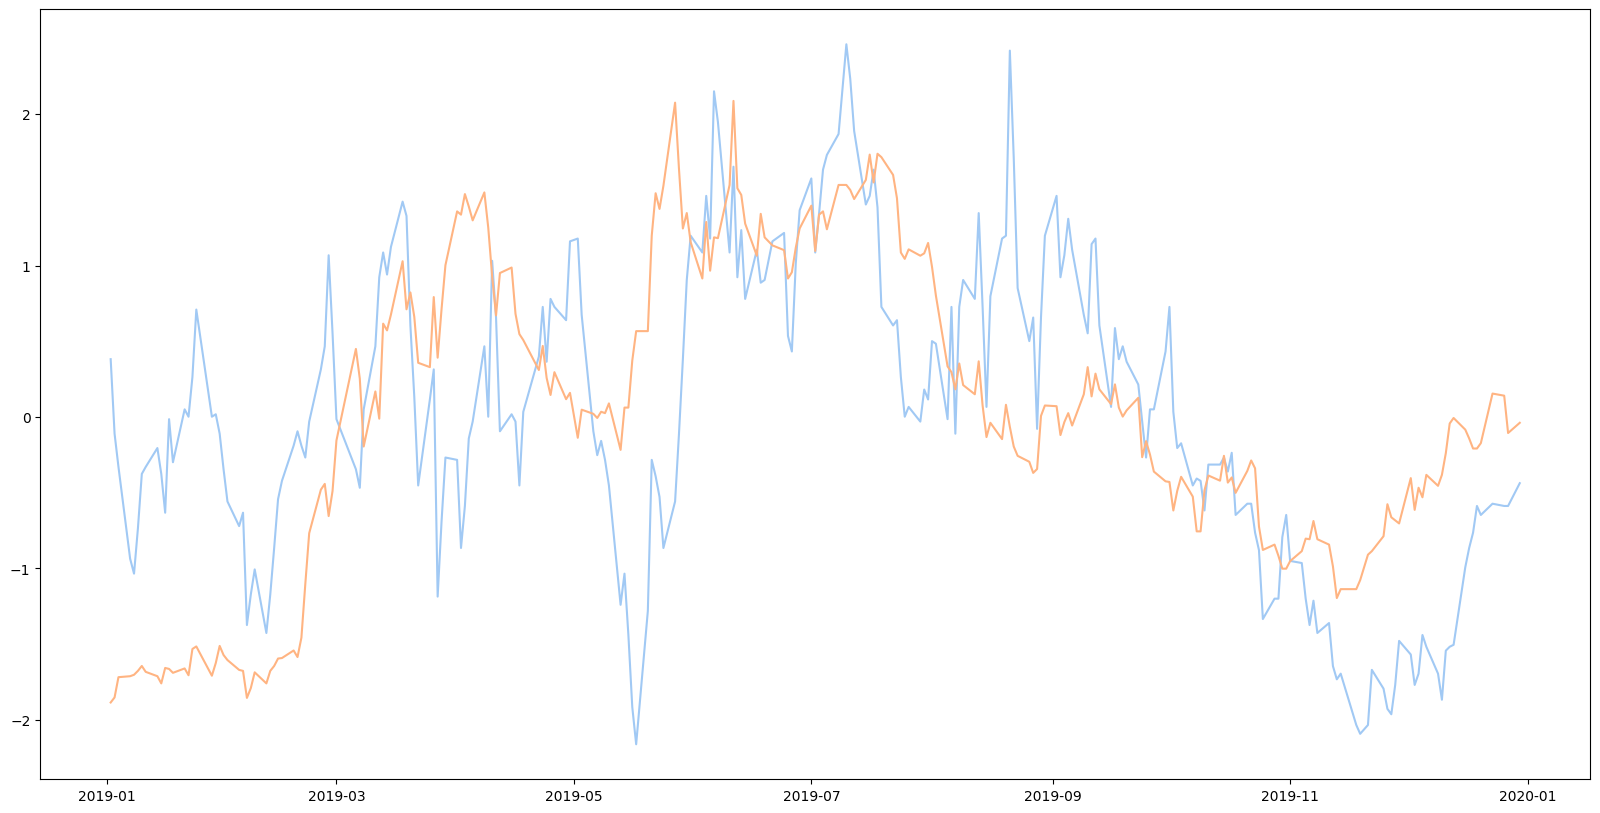

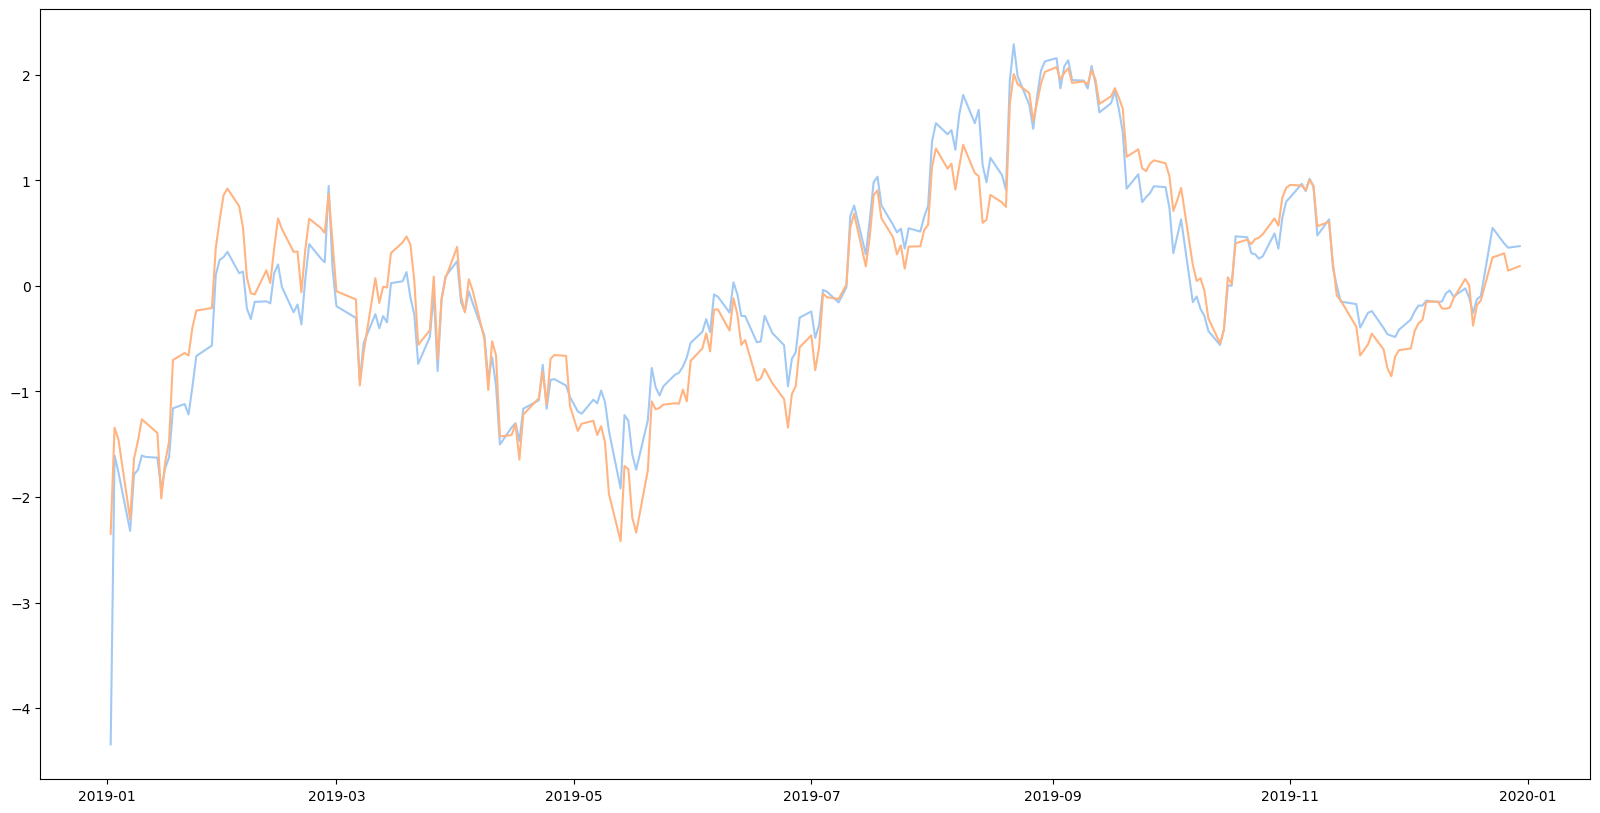

In [ ]:
# classes = classificacao['classes'].value_counts().index

for classe in classes:
    plt.figure(figsize=(20, 10))
    for i in range(classificacao.shape[0]):
        if classificacao['classes'][i] == classe:
            plt.plot(papeis.index, X[i])
    ## SALVANDO AS PLOTAGENS
    plt.savefig(f'resultados/{intervalo}/classes/classe_{classe}.png')
    

## DUVIDAS

* como avaliar os modelos criados

Métricas internas: Essas métricas utilizam apenas as características dos dados e os rótulos atribuídos pelo modelo para avaliar a qualidade dos clusters. Exemplos comuns de métricas internas incluem o Índice de Silhueta (Silhouette Score), Coeficiente de Calinski-Harabasz (Calinski-Harabasz Index) e Índice de Davies-Bouldin (Davies-Bouldin Index). Essas métricas fornecem uma medida da coesão interna e separação entre os clusters.

In [ ]:
## próxima semana

## intervalo -> 2010 - 2020 (jan) 
## plotar classes todas as ações classificadas em cada classe

## fazer o mesmo experimento para 2010 ate 2020 e depois filtar um ano que nao teve anomalias signoficativas e fazer o agrupamento

## adicionar as colunas resposta a tabela

## pegar apenas as empresas listadas durante todo o periodo

## tese mestrado/doutorado agrupamento das series


## refazer o cronograma focando no desenvolvimento do modelo

## Comparando os resultados

In [ ]:
X_p

ABEV3     B3SA3     BBAS3     BBDC3     BBDC4     BEEF3  \
Date                                                                     
2019-01-02 -2.333666 -1.818349 -0.191534 -1.268852 -0.967946 -2.201258   
2019-01-03 -2.088947 -1.604595 -0.118442 -0.884607 -0.762965 -2.083982   
2019-01-04 -1.797355 -1.789830 -0.118442 -1.305494 -0.930882 -1.896891   
2019-01-07 -1.889256 -1.816564 -0.235594 -1.148201 -0.679931 -1.924315   
2019-01-08 -2.333666 -1.802297 -0.439519 -0.937469 -0.551406 -1.979829   
...              ...       ...       ...       ...       ...       ...   
2019-12-20  0.887591  1.458283  0.679156  1.001185  0.255745  1.372470   
2019-12-23  0.936935  1.154037  1.194640  1.448319  0.380428  1.369783   
2019-12-26  1.189195  1.123633  1.389742  1.690389  0.631039  1.517607   
2019-12-27  1.131619  0.781482  1.315323  1.542307  0.553699  1.542458   
2019-12-30  0.646881  0.603988  1.266542  1.502004  0.525942  1.567001   

               BRAP4     BRFS3     BRKM5     CCRO3  ...     SBSP3    TAEE11  \
Date                                                ...                       
2019-01-02 -0.100727 -1.373147  1.055390 -1.435136  ... -2.317755 -1.905172   
2019-01-03 -0.631189 -1.487536  1.074644 -1.214112  ... -1.815632 -1.853644   
2019-01-04  0.246343 -1.492586  1.038606 -1.292857  ... -1.661171 -1.166800   
2019-01-07  0.347446 -1.474874  1.015501 -1.492658  ... -1.819336 -1.462839   
2019-01-08  0.254489 -1.300545  1.013447 -1.298507  ... -1.793433 -1.477106   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-20  2.302375  0.616150 -1.193498  1.855859  ...  1.768050  1.947128   
2019-12-23  2.457349  0.563452 -1.032637  2.014320  ...  1.815989  2.033614   
2019-12-26  2.630075  0.686332 -0.872411  2.122603  ...  2.030237  2.273552   
2019-12-27  2.662884  0.697772 -0.827188  1.986058  ...  2.059793  2.210039   
2019-12-30  2.414733  0.690144 -0.927045  1.913026  ...  1.888250  2.347224   

               TIMS3     TOTS3     UGPA3     USIM5     VALE3     VIVT3  \
Date                                                                     
2019-01-02  0.202683 -1.958480  1.468702  1.128116  0.615632 -0.901307   
2019-01-03 -0.081073 -1.873206  1.364867  0.904178 -0.107912 -1.191146   
2019-01-04 -0.004434 -1.770382  1.326960  1.496972  1.013640 -1.372000   
2019-01-07  0.450247 -1.852738  1.150235  1.517889  0.911195 -1.307413   
2019-01-08  0.911568 -2.008205  1.053274  1.138730  1.094680 -1.849640   
...              ...       ...       ...       ...       ...       ...   
2019-12-20  2.349626  1.732171  0.901366  0.667389  2.002296  2.270359   
2019-12-23  2.389982  1.677251  1.071758  0.882745  1.919921  2.325958   
2019-12-26  2.459736  1.629596  1.133343  0.882745  2.002296  2.646731   
2019-12-27  2.459736  1.475072  1.160326  0.775302  1.541383  2.446695   
2019-12-30  2.486394  1.455577  1.106122  0.861294  1.427435  2.340708   

               WEGE3     YDUQ3  
Date                            
2019-01-02 -1.388169 -2.123574  
2019-01-03 -1.157680 -2.133483  
2019-01-04 -1.046705 -1.949764  
2019-01-07 -1.201184 -2.193511  
2019-01-08 -1.284645 -2.079319  
...              ...       ...  
2019-12-20  1.811729  1.923357  
2019-12-23  1.806205  1.966771  
2019-12-26  1.861732  1.947376  
2019-12-27  1.885287  1.957142  
2019-12-30  1.852253  1.891076  

[248 rows x 54 columns]

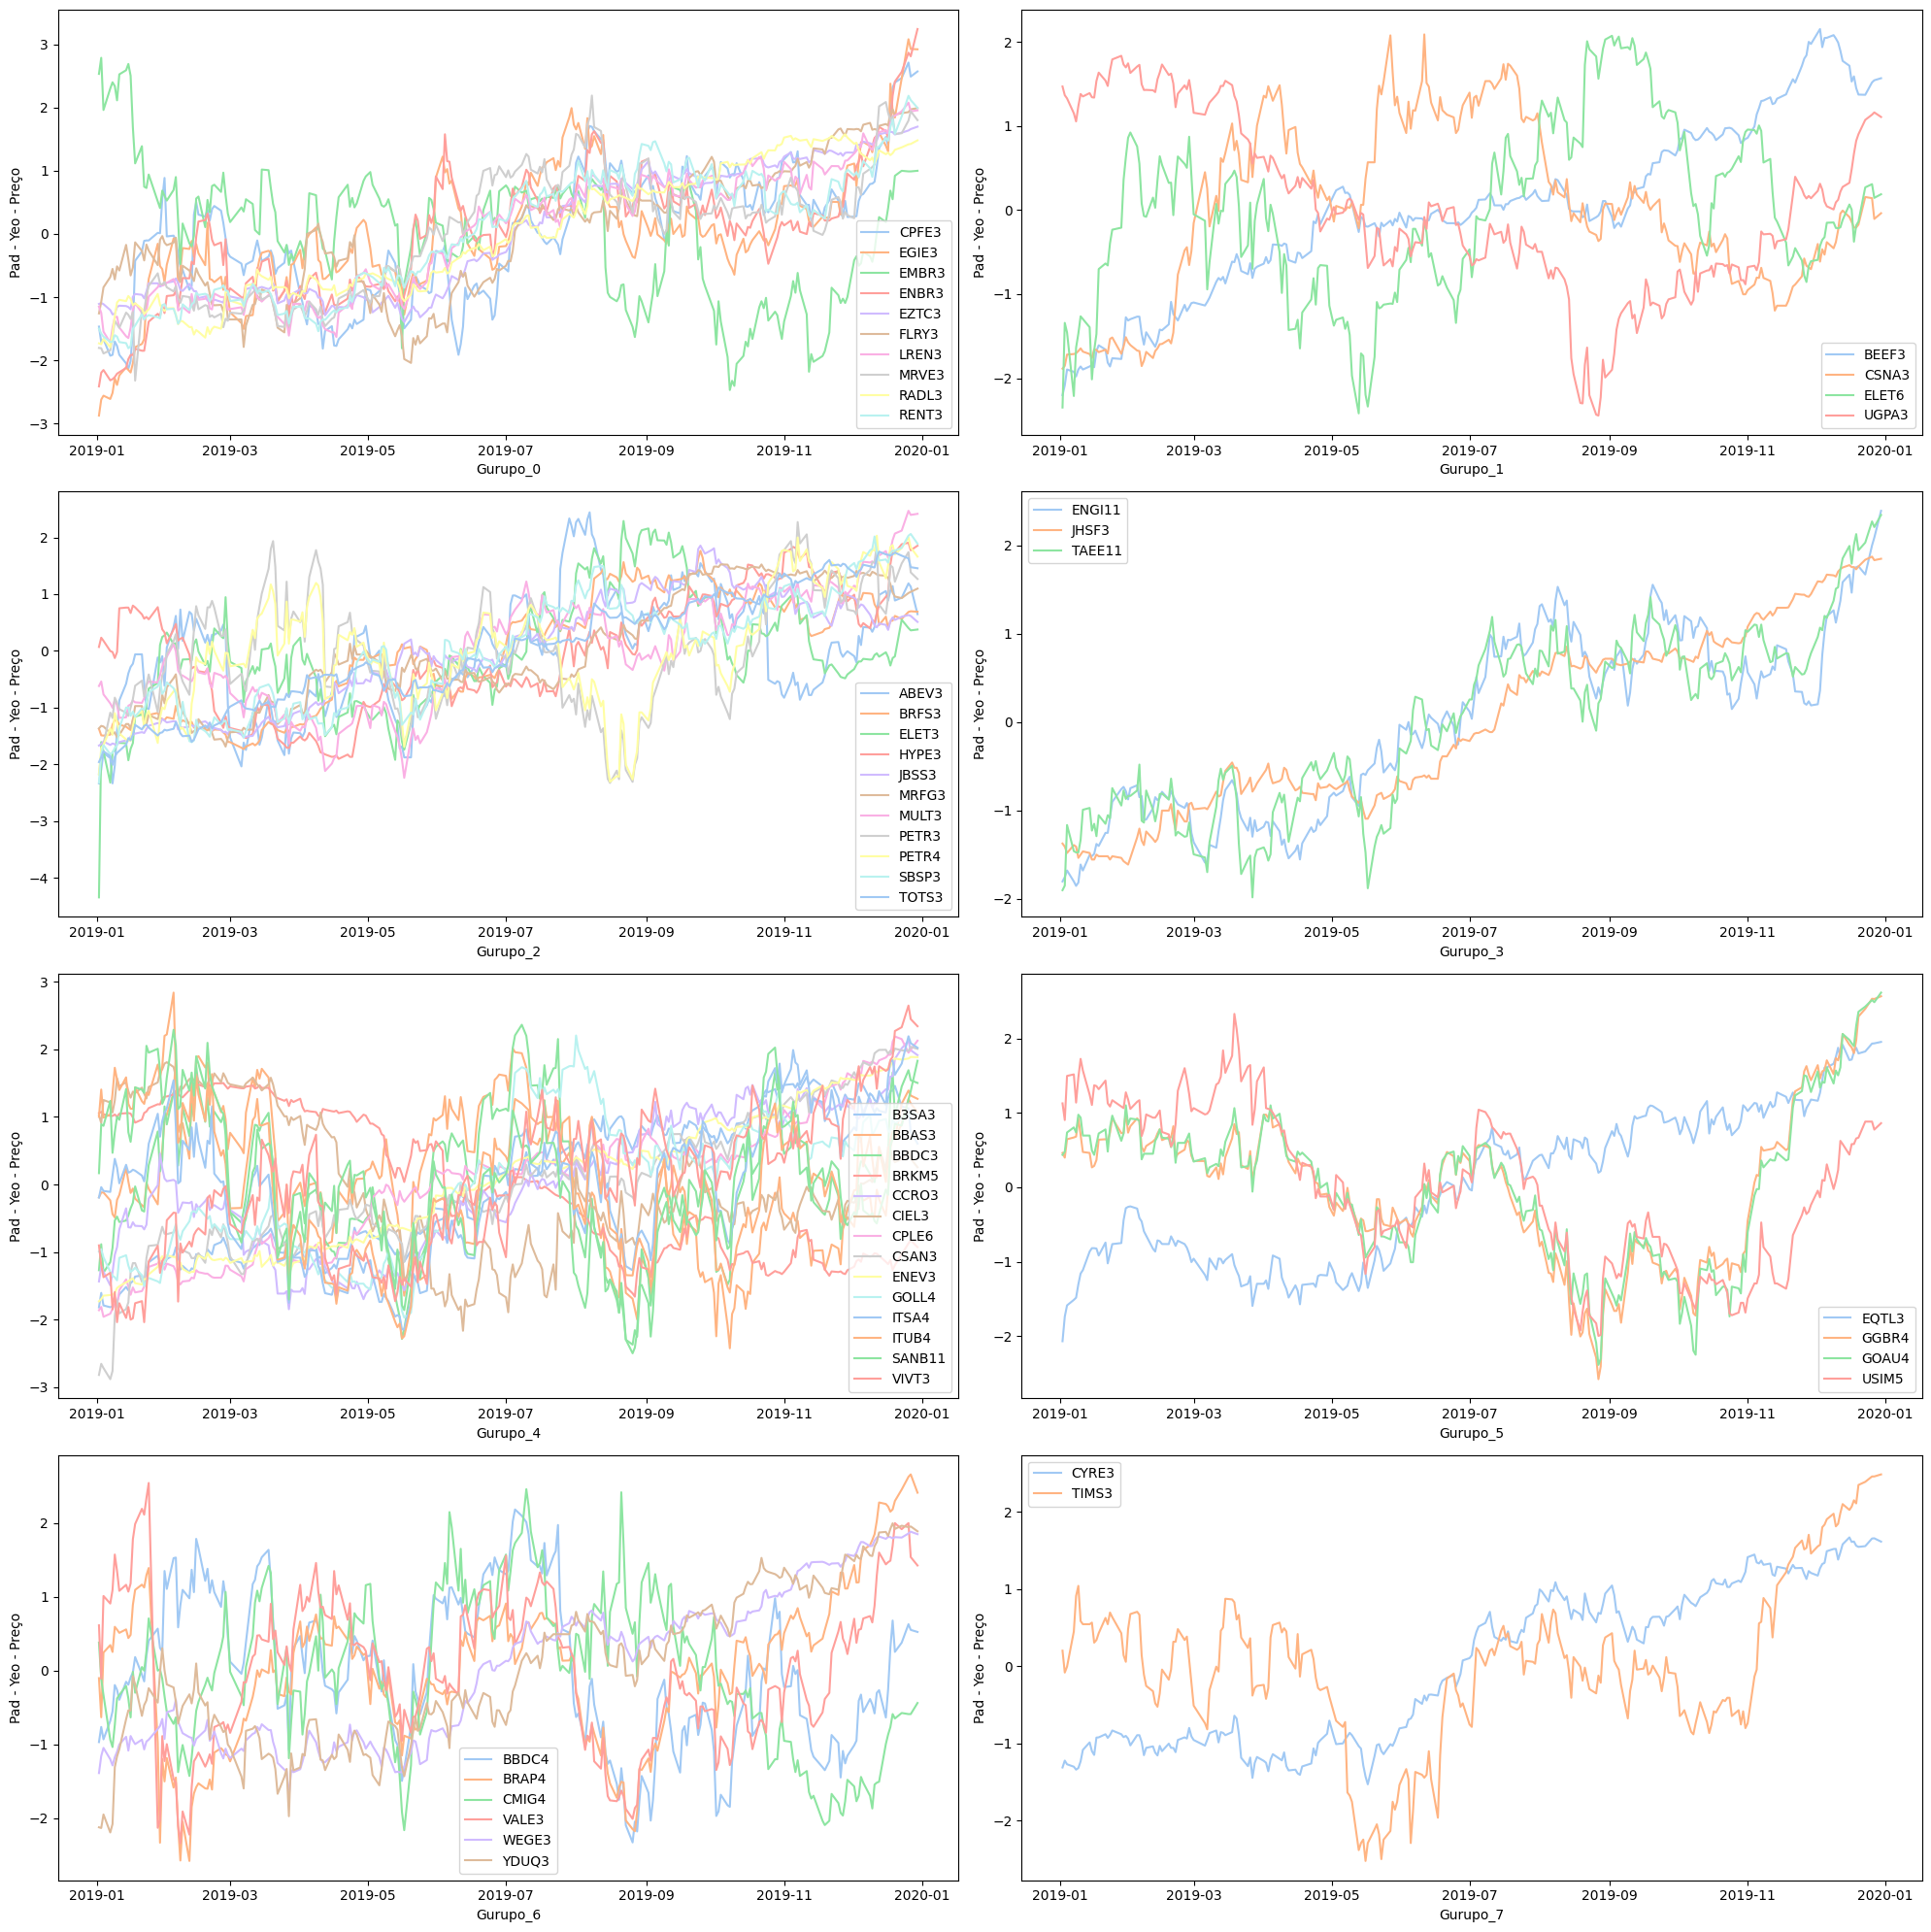

In [ ]:
# anos = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
anos = [2019]
for ano in anos:

    dados = pd.read_excel(f'data/{ano}.xlsx', index_col='Date')

    classificacao = pd.read_excel(f"resultados/{2010}/classes.xlsx")
    classes = classificacao['classes'].value_counts().index.sort_values()
    ativos = classificacao['ativos']

    # X = np.array(dados.T)
    X = np.array(X_p.T)

    fig, axs = plt.subplots(4,2 , figsize=(20, 20))
    for i, ax in enumerate(axs.flatten()):
        
        # ax.set_title(f'{papeis.columns[i]}')
        for j in range(classificacao.shape[0]):
            if classificacao['classes'][j] == classes[i-1]:
                ax.plot(dados.index, X[j],label=ativos[j])
        
        ax.set_xlabel(f'Gurupo_{i}')
        ax.set_ylabel('Pad - Yeo - Preço')
        ax.legend()

    plt.tight_layout()

    ## SALVANDO AS PLOTAGENS
    plt.savefig(f"resultados/{ano}/plotagemTodasClasses.png")


In [ ]:
#### UNIR OS RESULTADOS PARA CONSTRUIR A MATRIZ DE FREQUENCIAS
anos = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
ano = 2010
dados = pd.read_excel(f'resultados/{ano}/classes.xlsx')
dados.drop('classes', axis=1, inplace=True)

for ano in anos:
  dados[ano] = pd.read_excel(f'resultados/{ano}/classes.xlsx')['classes']

In [ ]:
colunas = []
for j in range(dados.shape[0]):
  linha = []
  for i in range(dados.shape[0]):
    iguais = (dados.loc[j] == dados.loc[i]).sum()
    linha.append(iguais)
    
  colunas.append(linha)
    
    
    
tabela = pd.DataFrame(data=colunas)
tabela.columns
 
tabela.index=dados['ativos']
tabela.columns=dados['ativos']

In [ ]:
tabela.to_excel('tabelaFrequenciaClassificacao.xlsx')

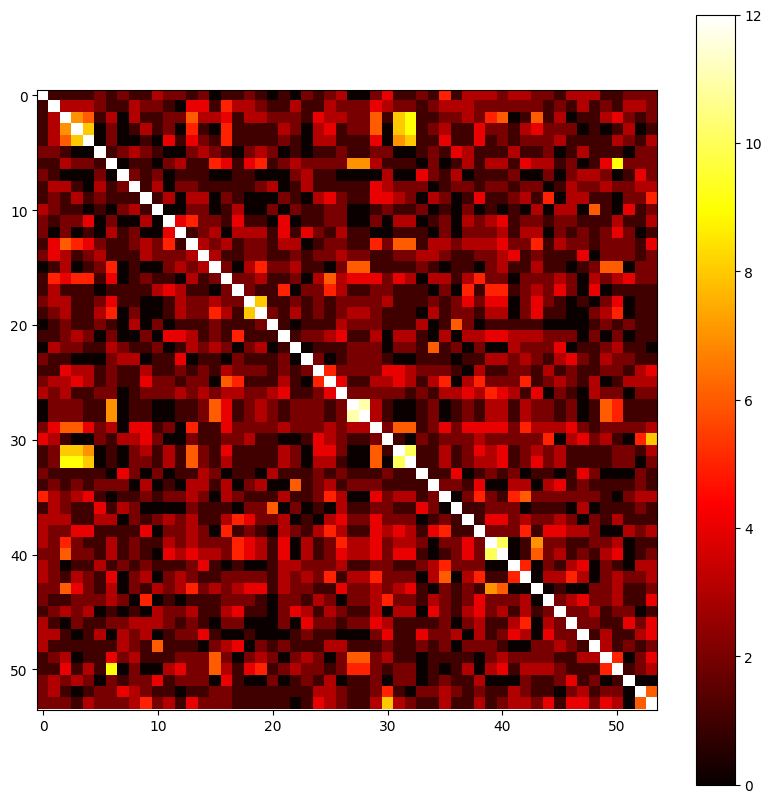

In [ ]:
plt.figure(figsize=(10, 10))

plt.imshow(tabela, cmap='hot', interpolation='nearest')

plt.colorbar()
plt.savefig('graficoCalorFrequenciaClassificacao.png')
plt.show()